# Lab 5

## Jennifer Vo, lab partners with William Olsen

## Introduction

In this lab, we will be starting a 4-part lab sequence about particle physics. My lab partner and I chose to work with the LHC particle physics datasets. We will not be working with real LHC data, but instead looking at training datasets in Lab 5.

### Large Hadron Collider
The Large Hadron Collider (LHC) is the world's largest and highest-energy particle accelerator, located below ground at the France-Switzerland border. At the LHC, the ATLAS is one of the detectors used to investigate different physics (1). Particle accelerators recreate natural phenomena, where particles travel at high energies and collide, producing different particles, which in turn decay and have their own momenta (2).

### Particle Collisions, Decays, and The Higgs Boson
When particles collide, we can use kinematics and special relativity theory to describe the transfer of energy and momenta. We can also use particle physics to describe the different decays into new particles.

On July 4th, 2012 scientists working at CERN on the LHC experiments announced the discovery of a particle in the mass region of 125 GeV, consistent with the theorized Higgs boson. The Higgs boson is the first elementary particle seen to have no spin. It is the quantum particle of the Higgs field, which is a scalar field. Elementary particles which interact more with the Higgs field have more mass (3).

In this 4-part lab sequence, my lab partner and I will be working with a training set and pseudo-experiment data simulating the Higgs boson signal and background data to try to find the Higgs boson, similar to what the scientists working at CERN's LHC did upon their discovery of the particle consistent with the Higgs boson.

### Experimental Set Up
The Higgs boson is very unstable, decaying into other particles almost immediately. Elementary particles such as quarks and leptons result from the Higgs boson decay, and their paths and energies are subsequently recorded by the ATLAS detector. It is these measurements which are then analyzed to determine if the elementary particles resulted in the decay of a particle consistent with the Higgs boson, or not (4).

Now, I will explain some basic experimental set up at ATLAS, and how the measurements are collected.

The LHC is in a shape of a ring, where the particles are accelerated through to collide. For the Higgs boson measurement, protons are the particles being accelerated. The pipe is centered along the cylindrical axis of symmetry of the detector. The z axis is defined as the path along which protons are accelerated. After collision, the particles emerge, and hit the detector in all directions. These particles' paths and energies are then measured (5).

Protons are made up of elementary particles, including softer gluons, harder gluons, quarks and antiquarks. When protons are accelerated and collide, some of these particles will hit each other. The softer gluons will scatter, but we are interested when the harder gluons and quarks hit each other because those will result in a significant amount of momentum and energy in the direction transverse to the beams. Transverse momenta is identified in this training dataset using the variable pt.

A jet is a collection of particles that go towards the same direction in the detector. As scientists and researchers, we can only define jets using the experimental observables, such as energy and momenta (in particular, we use the 4-momentum vector). 

A simple way to describe a jet is to draw a cone with size radius $R = \sqrt{((\triangle\eta)^2+\triangle(\phi)^2)}$ around some particle, with everything within the cone as considered to be the jet. There are two angles: $\phi$, the azimuthal angle around the z axis, and $\theta$ the polar angle from the z-axis, used to describe the axis along which the jet of measurement is located. Pseudorapidity, $\eta$ is a geometric quantity used to describe a spatial position, and it is defined as the following: $\eta = -ln(\tan(\frac{\theta}{2}))$. As $\theta$ goes from 0 to $\pi$, $\eta$ goes from $+\infty$ to $-\infty$. 

Once a jet is defined, we can calculate the jet's 4-momentum, which is the sum of all the 4-momenta of the particles in the jet. Conservation of 4-momentum tells us that the jet's 4-momentum should be similar to that of the parton which initiated the jet, but due to quantum mechanics this conservation is not exactly true. Over the years, the equipment of the ATLAS detector has seen improved resolution, which has allowed for better classification of all of the jet's particles (6).

Next we will discuss jet substructure, where we are considering "signature" particles such as W's, Z's, Higgs bosons, and top quarks. When these particles' transverse momenta pt are much greater than their respective resonance particle mass (in other words the jet's energy is much greater than rest mass), then the resulting jets of the decays will be highly collimated (along the same direction). It is then difficult to distinguish between jets, as all of the decay products are so close together. Instead, we consider 2 or 3-pronged decays to identify the hadronic decays of boosted Higgs particles from the QCD (background) quarks or gluons. The variables of the subjet 4-momenta will help us determine these best jet substructure classifications.

Source links:
1. https://home.cern/science/experiments/atlas
2. https://home.cern/science/accelerators/large-hadron-collider/safety-lhc
3. https://home.cern/science/physics/higgs-boson
4. https://en.wikipedia.org/wiki/Higgs_boson#Properties_of_the_Higgs_boson
5. https://arxiv.org/pdf/1709.04533.pdf
6. https://arxiv.org/pdf/1709.04533.pdf

### The Data
At the LHC, around 1 billion events are produced each second, with each event's data taking up 1 MB of storage. Current electronics can record only 200 MB/second, so the 1 billion events/second must be reduced to around 100 events/second to be recorded and later analyzed. Thus, most of the data is not recorded. Certain triggers are defined that will cause an event to be recorded. For example, the Higgs boson is theorized to have an associated mass quantity of around 125 GeV, so in practice it would not make sense to keep real data with mass too far from this value.

Next, I will explore the dataset by opening the signal (Higgs) file and background (QCD) file, and saving them both to dictionaries. I will plot these variables on histograms to compare the distributions of these variables.

There are two groups of datasets in different pT ranges. For each pT range, there is simulated data and pseudo-experiment data. In this lab we are working with the following data files:

low PT: Sample_pt_250_500
- Training sample and normalization
    - higgs_100000_pt_250_500.pkl (Expected yields  N_higgs=100 )
    - qcd_100000_pt_250_500.pkl (Expected yields  N_qcd=20000 )

high PT: Sample_pt_1000_1200
- Training sample and normalization
    - higgs_100000_pt_1000_1200.pkl (Expected yields  N_higgs=50 ) 
    - qcd_100000_pt_1000_1200.pkl (Expected yields  N_qcd=2000 )
    
I will be working with the low PT set, while my lab partner will be working with the high PT set.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import math
import pickle

#this sets the size of the plots to something useful
plt.rcParams["figure.figsize"] = (7,4)

In [2]:
# import library
import pickle

# open the file of interest, and use pickle loading
infile = open ("qcd250-500.pkl",'rb')
qcd_dict = pickle.load(infile)

# list all keys of the files
qcd_dict.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [3]:
# open the file of interest, and use pickle loading
infile = open ("higgs250-500.pkl",'rb')
higgs_dict = pickle.load(infile)

# list all keys of the files
higgs_dict.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

As we can see from the keys of both data files, each set contains 14 features: ‘pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR'.

Let's calculate how many total jets we have from both training data sets.

In [4]:
print(len(higgs_dict['pt']))
print(len(qcd_dict['pt']))

100000
100000


There are 100k total events (jets) in both the background (QCD) data set and the signal (Higgs) dataset, each with associated variables (14 total var). What is the interpretation? The experiment was run and data from 100,000 jets were collected. There were 100k background jets and 100k "real" Higgs signal jets.

Let's try printing out some variables, for example mass and d2, of just the first 10 jets.

In [5]:
for i in range(10):
    print(higgs_dict['mass'][i], higgs_dict['d2'][i])

125.15036485403486 1.2980200835589373
130.55267214662751 1.445626317832899
125.70306309880351 0.986596849742669
126.21585336608149 1.2184665392866647
132.18250371689544 1.2917844364435773
125.67653506886116 0.4343656746345235
127.65400794990293 0.9312049446719695
124.16656852260293 0.9493560863407668
122.13035265114684 3.0022665455324082
125.19144633816678 0.5539996032675585


Next, let us try plotting histograms of the variables. I will plot both the background and signal back to back to make it easy to compare. Let me first define a function, since I will be looking at all 14 variables.

In [6]:
def plot_qcd_higgs(var, unit):
    plt.subplot(2, 1, 1)
    plt.hist(qcd_dict[f'{var}'], bins = 100, label = 'Background')
    plt.xlabel(f'{var} ({unit})', fontsize = 15)
    plt.ylabel('Event counts', fontsize = 15)
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.hist(higgs_dict[f'{var}'], bins = 100, label = 'Higgs signal')
    plt.xlabel(f' {var} ({unit})', fontsize = 15)
    plt.ylabel('Event counts', fontsize = 15)
    plt.legend()
    plt.show()
    
# If using this function, need to fix (bins and histogram)
# def plot_difference(var, unit):
#     x, diff = np.histogram(qcd_dict[f'{var}'], bins = 100)
#     plt.plot(x, diff)
#     plt.xlabel(f' {var} ({unit})', fontsize = 15)
#     plt.ylabel('Event counts', fontsize = 15)
#     plt.show()

We will plot the variables according to the order in the dictionary keys.

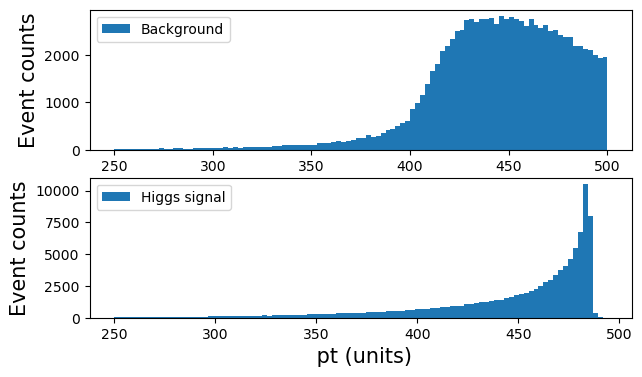

In [8]:
plot_qcd_higgs('pt', 'units')

We observe that in both datasets, the minimum transverse momentum is 250 units, and the maximum transverse momentum 500. In the background, observe that the majority of the measurements lie in the 400-500 range of transverse momentum with a peak event count at around 450. However, in the signal, the measurements have a peak event count at around 480 units. Notice also that the signal distribution is skewed greatly toward the left, being distributed to almost appear as an exponential growth function.

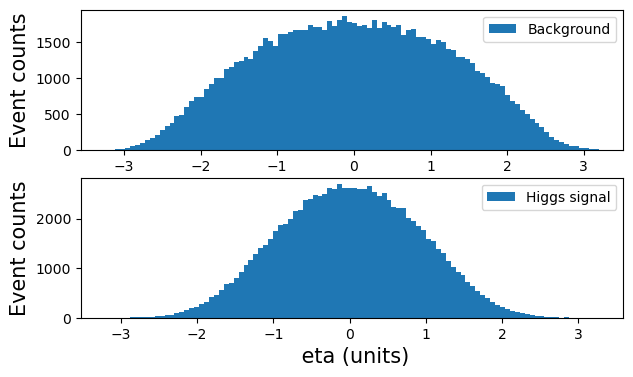

In [9]:
plot_qcd_higgs('eta', 'units')

For eta, it appears that the background and signal distribution share a mean of 0. As eta is psuedorapidity, this makes sense; all jets range from $\theta = 0$ to $\theta = \pi$ in a nearly uniform distribution, therefore pseudorapidity should have a mean of 0. Observe that the signal's distribution has a smaller width; this implies that the jets from the Higgs boson will have a tendency to lie closer to $\theta = \frac{\pi}{2}$.

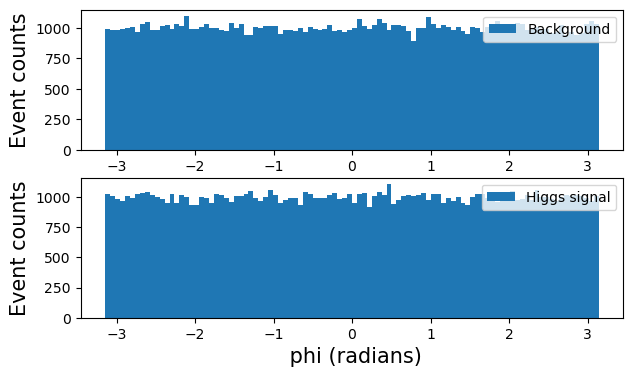

In [11]:
plot_qcd_higgs('phi', 'radians')

Phi is the azimuthal angle which goes around the beam. Observe that the plots of phi in the background and Higgs signal datasets look approximately the same. As before with pseudorapidity, this makes sense. The jets will take on the entirety of the range of phi in a nearly uniform distribution. 

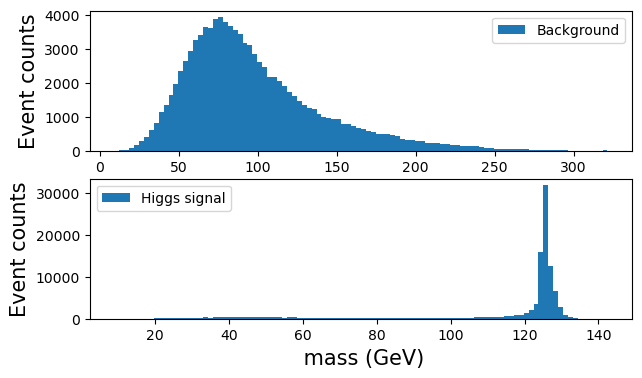

In [12]:
plot_qcd_higgs('mass', 'GeV')

I expect that this variable is equal to the total recorded mass of all particles produced from the collision. In the background, the mass of the particles measured range from 0 to slightly over 300 GeV, with a peak event count at approximately 75 GeV. However, in the signal dataset there is a peak at about 125 GeV, with a much narrower distribution than the background. If you look very carefully, there also appears to be a second peak (albeit much, much smaller) around ~45 GeV. There is a large distinction here between the background and signal.

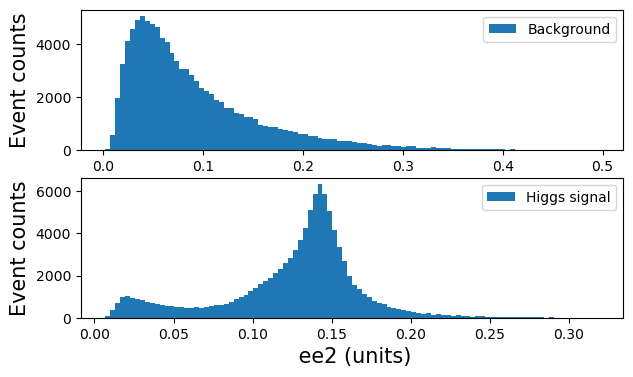

In [14]:
plot_qcd_higgs('ee2', 'units')

I am unsure what ee2 measures, but it is clear that the background data and signal data take on very different distributions. The background data has a single peak, large width, skeweing toward the right with a peak at approximately 0.04 (units). On the other hand, the Higgs signal ee2 measurements have two peaks, one around 0.14 (units) and a much smaller one around 0.02 (units).

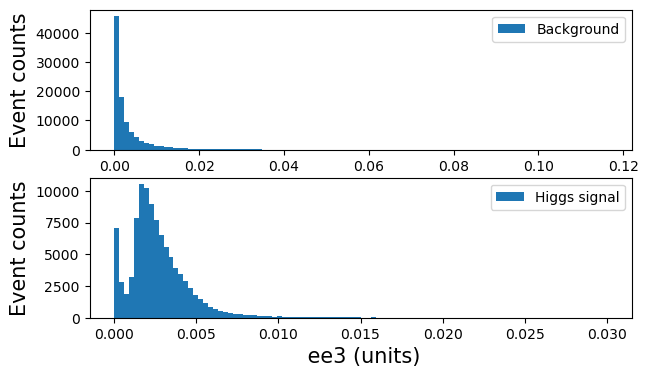

In [15]:
plot_qcd_higgs('ee3', 'units')

For the ee3 measurement, the background and dataset appear to differ only slightly. For both distributions, the majority of the data lies in the 0-0.02 (units) range and they are skewed to the right. However, the background has one peak, at 0 (units), while the ee3 measurement of the Higgs boson again has two peaks, one at 0 (units) and another at approximately 0.002 (units). 

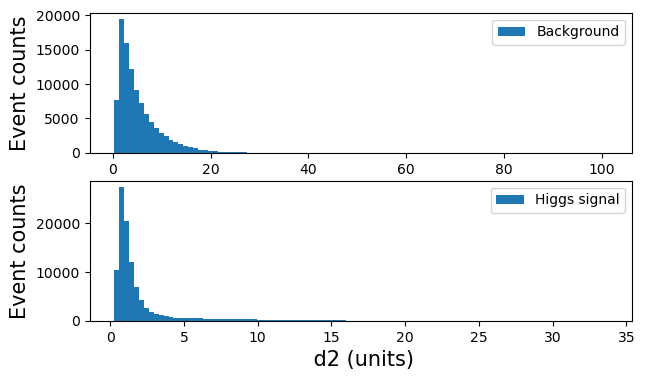

In [16]:
plot_qcd_higgs('d2', 'units')

The distributions for d2 look remarkably similar for the background and Higgs signal data, with the exception that the Higgs signal d2 data has a much narrower width. Both distributions have a peak close to 0 (units) and are skewed to the right.

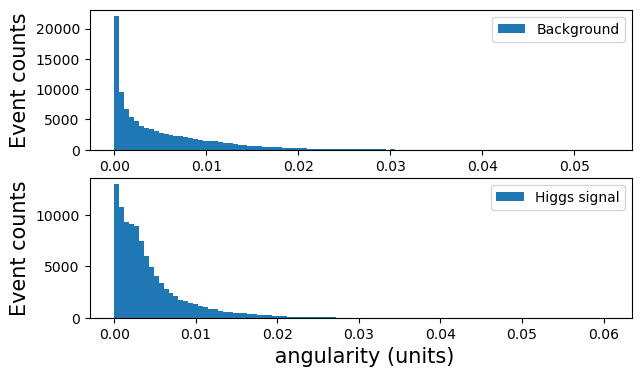

In [17]:
plot_qcd_higgs('angularity', 'units')

For angularity, both background and Higgs signal distributions appear to show exponential decay (skewed to the right), with the majority of the data lying between 0 and 0.02 (units). However, the Higgs signal data for angularity has a greater width.

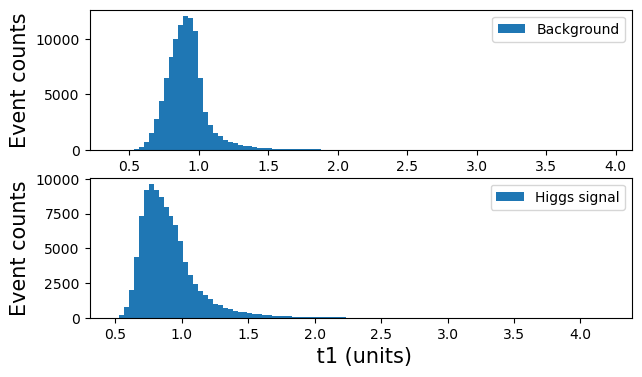

In [18]:
plot_qcd_higgs('t1', 'units')

The distributions of t1, the datasets corresponding to the division of the particles into only a single jet, look almost similar between the background and Higgs signal. Both datasets range in the 0.5-2.0 (unit) range, with similar widths and averages fairly close together. However, it is clear that the datasets do have different averages: the background with a distribution peak at around 0.9 (units) and the Higgs signal with a distribution peak at around 0.75 (units).

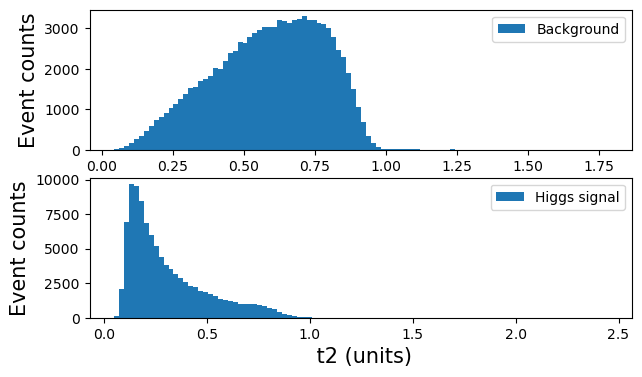

In [20]:
plot_qcd_higgs('t2', 'units')

The distributions of t2, the datasets corresponding to the division of particles into 2 subjets, look very different between the background and Higgs signal. The majority of both datasets' values are within the 0 to 1.0 range. However, the width of the background t2 data is much larger, with a peak at around 0.7 (units) and skewed more to the left. The width of the Higgs signal is much smaller, with a peak around 0.15 (units) and skewed more to the right.

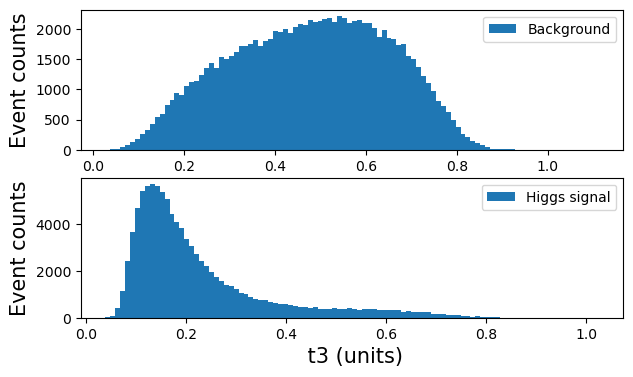

In [22]:
plot_qcd_higgs('t3', 'units')

The distributions of t3, the datasets corresponding to the division of particles into 3 subjets, look very different between the background and Higgs signal. However, the distributions look quite similar to the t2 distributions. The majority of the data for t3 lies in the 0 to 0.8 (units) range. The background has a much larger width and a peak at around 0.55 (units), with a slight skew toward the left. The Higgs signal data for t3 has a much smaller width, a peak at ~0.15 (units) and is skewed more toward the right.

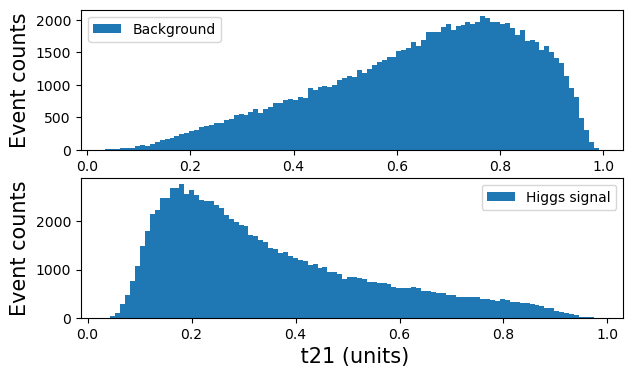

In [23]:
plot_qcd_higgs('t21', 'units')

t21 is the ratio of the data of t2 to t1. These distributions for the background and Higgs signal are pretty distinguishable. The background data for t21 is skewed to the left with a peak at approximately 0.78, while the Higgs signal data for t21 is skewed to the right with a peak at approximately 0.2.

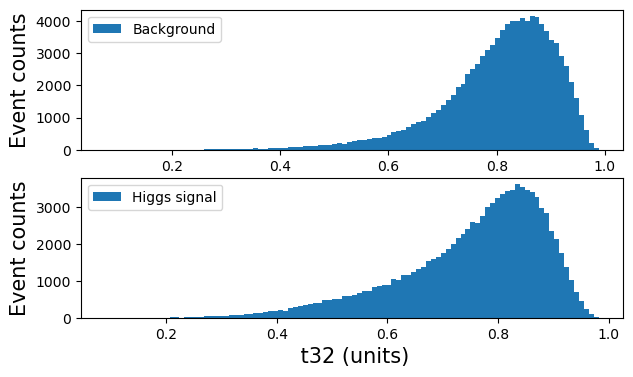

In [24]:
plot_qcd_higgs('t32', 'units')

t32 is the ratio of the data of t3 to t2. The t32 distributions between the background and Higgs signal are visually very similar, with no major differences.

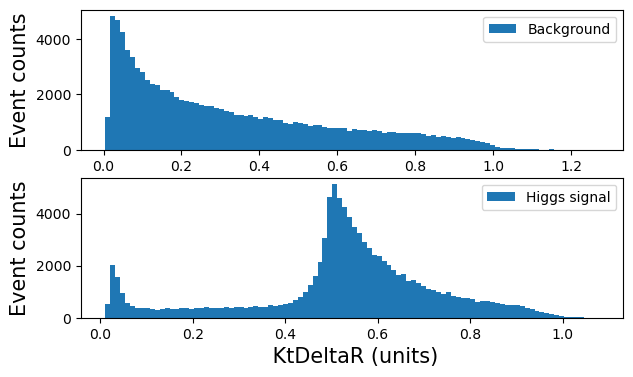

In [25]:
plot_qcd_higgs('KtDeltaR', 'units')

For KtDeltaR, the distributions have several notable differences. First, the majority of both datasets lie in the range of 0 to 1.0. The background KtDeltaR dataset is skewed to the right with a peak near 0 (units). The Higgs signal has two peaks, one close to 0 and one at approximately 0.5 (units).

## Summary of Observations
As I observed, not all features provided discrimination power between the signal and the background. In particular:
- The data for phi and t32 were visually very similar between the signal and the background. 
- The data for d2, eta, angularity, and t1 were all somewhat similar between the signal and the background. 
- The data for pt, mass, ee2, ee3, t2, t3, t21, and KtDeltaR were all very different between the signal and the background.

#### Correlations
It appears that the data for __ee2, ee3, and KtDeltaR__ are correlated, as all have similar distributions: The background datasets are right-skewed with one peak, while the signal datasets are also right-skewed but have 2 peaks. I would also note here that the __mass__ data appears to follow a very similar distribution with a couple differences. The signal data's mass distribution has two peaks with very different heights, while the 2 peaks of the other variables in the signal data are of slightly more comparable height. Also, the signal data's mass distribution has a peak at 125 GeV that is approximately symmetric (no skew).

The data for __t1, t2, t3, t21, and t32__ are explicitly related as t21 is the ratio of t2 to t1, while t32 is the ratio of t3 to t2. Observe that the data for t2 and t3 for both datasets are visually very similar: both t2 and t3 for the background are only slightly left-skewed with a peak around 0.6-0.7 (units), while both t2 and t3 for the signal are right-skewed with a peak around 0.1-0.15 (units). This suggests that the measurements for t2 and t3 are approximately indistinguishable, and in fact this is exactly what we can conclude by looking at the histograms of t32. The background and signal data for t32 are almost identical.

#### Other notes
The histograms for __angularity and d2__ appear visually very similar in both datasets for the background and the signal, skewing to the right with averages very close to 0. However, the comparison in the width of the background and signal are different between angularity and d2. Observe that for d2, the background has a greater distribution width, while for angularity, the signal has a greater width.

The data for __phi__ appears uniformly distributed, while the data for __eta__ is normal. Both of these are geometric quantities. Phi is the azimuthal angle, and it being uniformly distributed simply means that the jets go off in all directions azimuthally from the beam. Pseudorapidity eta, a function of theta, is normally distributed around a mean of 0 (corresponding to $\theta = \frac{\pi}{2}$).

## Discovery Sensitivity
The training dataset used in this lab provided simulated data samples of collisions: 100k samples resulting from collisions producing a true Higgs boson signal, and 100k samples resulting from collisions producing background QCD particles. With these data files, we are told that if the signal-free background had 20,000 jets, we would expect 100 true signals which come from Higgs boson jets.

I would like to calculate what the discovery significance would be with the initial training set. The background collisions are discrete, and known to be Poisson-distributed. If the background has an expected value of $\lambda$ = 20,000 jets then an expected Higgs boson signal would be of 20,100 jets. What would be the probability for the background to produce a signal of 20,100 or greater? Intuitively, the significance level associated with this probability would be very low, too low to be considered as a physics discovery (which requires 5 sigma). Let us calculate this definitively: 

In [26]:
lambda1 = 20000
signal1 = 20100
prob1 = stats.poisson.sf(signal1, lambda1)
sigma1 = stats.norm.isf(prob1)
print(f'The significance of the background QCD particles producing a measurement of 20,100 jets is {sigma1:.2f} sigma.')

The significance of the background QCD particles producing a measurement of 20,100 jets is 0.71 sigma.


Our goal is to have measurements which correspond to a significance level of 5 sigma for the background to produce that signal such that we can claim the discovery of a particle resembling the Higgs boson. In order to do this, I plan on considering the variables of the dataset, and removing specific data ranges or entire variables from both of our data sets.

Since we will be altering the total number of data samples we are working with from 100k samples to some smaller value, the expected yields of both the signal and the background will decrease. In order to calculate this sensitivity, we will need to normalize each sample using the ratio of expected yields to the total data set size:

$$R_{qcd} = \frac{20000}{100000} = 0.2 $$
$$R_{signal} = \frac{100}{100000} = 0.01$$

Once I remove data from both sets and reduce the size of the total data set from $N_{initial} = 100000$ to $N_{new}$. I can then calculate the expected yields of the qcd jets and signal jets using the ratios I calculated above. 

$$yield_{qcd} = R_{qcd}*N_{new} \text{ and } yield_{signal} = R_{signal}*N_{new}$$

Finally, let us calculate how large of a signal the background would need to produce in order to obtain a 5 sigma discovery.

In [27]:
sigma2 = 5
prob2 = stats.norm.sf(sigma2)
signal2 = stats.poisson.isf(prob2, lambda1)
print(f'In order for the background QCD particles to produce a signal with a 5 sigma significance, a measurement of {signal2:.2f} jets is required.')

In order for the background QCD particles to produce a signal with a 5 sigma significance, a measurement of 20711.00 jets is required.


As I have calculated, 20,711 jets which would be needed for a detection of 5 sigma significance. I only expect 20,100 jets which gives me a significance of 0.71 sigma. 

Therefore next I would like to increase the expected discovery sensitivity of this experiment.

## Optimizing Discovery Sensitivity

In order to optimize the discovery sensitivity of observing the Higgs boson signal, I will improve upon this experiment by removing data from my datasets. In particular, I would like to remove data that consists primarily of the jets which result from background QCD particle collisions. Taking a look at the 14 variables that were simulated in this training set, I will apply selections to these features.

As an example, let us consider the feature of mass. The histogram plots for mass of both datasets are reproduced below.

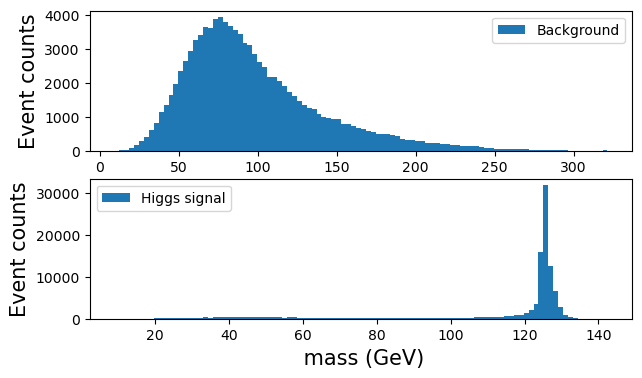

In [28]:
plot_qcd_higgs('mass', 'GeV')

I can observe that there is a very significant difference between the signal and the background data for mass. The signal data has two peaks, while the background data has only one. The signal data lies in the ranges of 20-60 GeV and 100-140 GeV, with the majority of the data in the latter. Whereas the background data spans the entire range of 0 to 300 GeV. To optimize my discovery sensitivity, I can remove jets from my datasets with mass measurements outside of the range of 100-140 GeV, which would consist of primarily the data of the background jets. In doing so, I am keeping most of the true Higgs boson signal data, while reducing the amount of background data I have in comparison.

I could do this similar selection for each of the remaining 13 features in the dataset. As I observed earlier, not all of these variables show some discrimination power between the background and the signal. If there is discrimination power, I can estimate an appropriate range of data values which I would like to keep in my datasets by visual observance of the graphs. For most distributions, this means I will be losing some Higgs boson signal data, but that is fine as long as I keep signal data loss to a minimum. After I remove this data, I plan to re-calculate the expected yields of the background jets and Higgs boson signal jets, and calculate the new significance (to be done in later labs).

For the sake of brevity, I will not reproduce graphs for each variable as I have already done so above. 

No changes in the dataset:
- For the feature of transverse momentum, __pt__, the range of the data measurements in both the signal and background is approximately the same. Thus, I will disregard this feature.
- I noted earlier that __phi and t32__ do not have any visual differences between the signal and the background, so I will disregard these two features.
- For __angularity__, the distributions are visually very similar with the signal distribution having a greater width, but the range of data is nearly the same (between 0 and 0.03 units). Thus, I will disregard angularity.
- The feature __t1__ has a similar case as angularity. I will disregard t1.
- The majority of __KtDeltaR__ measurements in the two datasets lie within the same range of 0 to 1.0. Thus, I will also disregard KtDeltaR as a variable.

Changes: limit range of data kept
- The distributions for __d2__ between the signal and the background have a similar shape and mean, but the width of the signal's distribution is much smaller. I will consider only the data which includes d2 values between 0 and 16 (units), and remove jet data associated with d2 values outside of this range.
- The case for __eta__ is the same as the case for d2: the shape and mean are similar, but the width is different. For eta, the signal's distribution also has a smaller width. I will consider only the data which includes eta values between -2.5 and 2.5 (units).
- For __ee2__, I observe that the signal data has the majority of its values of ee2 between 0 and 0.25 (units). Meanwhile, the background data range is slightly larger (0 to 0.3). Thus I will keep data only with ee2 in the range of 0-0.25 (units).
- For __ee3__, the majority of the signal data has ee3 between 0 and 0.01 (units), while the majority of the background data of ee3 ranges between 0 and 0.035. I will choose to keep only data with ee3 between 0 and 0.01 (units).
- Recall that t32 looks approximately the same between the signal and the background. This tells me it does not matter whether I choose to select data based on the differences in t2 or t3. I will focus my efforts on __t3__, and note that the majority of the signal data has the feature t3 falling in the range of 0 and 0.8 (units). The background, on the other hand, spans from 0 to ~0.9 (units). Thus, I will only consider data where t3 is in the range of 0 to 0.9 (units).